In [ ]:
from google.colab import drive
import glob
import os
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
imPath = []
for i in glob.glob('/content/drive/MyDrive/Dataset/Daging/*'):
  imPath.append(i)
nama = os.listdir('/content/drive/MyDrive/Dataset/Daging/')

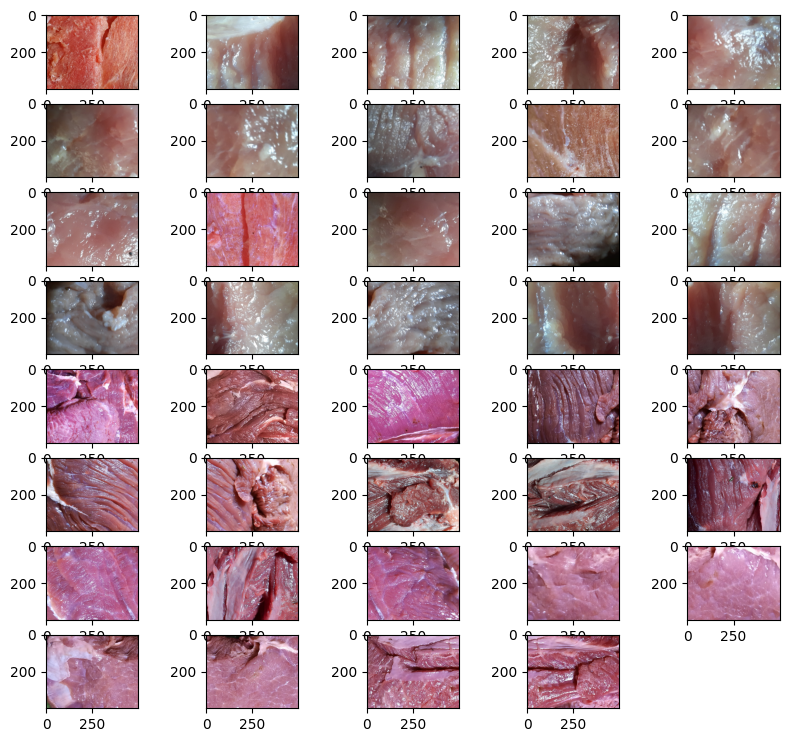

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import pandas as pd

row = 8
col = 5
fig = plt.figure(figsize=(10,9))
for i in range(1,row*col+1):
  if i < 40:
    x = mpimg.imread(imPath[i-1])
    fig.add_subplot(row,col,i)
    plt.imshow(x)

In [ ]:
def color_ext(img,name):
  R = np.mean(img[:,:,0].flatten())
  G = np.mean(img[:,:,1].flatten())
  B = np.mean(img[:,:,2].flatten())
  img_hsv = cv2.cvtColor(img,cv2.COLOR_RGB2HSV)
  H = np.mean(img_hsv[0])
  return [name,R,G,B,H]

feat = []
for i in range(len(imPath)):
  img = mpimg.imread(imPath[i])
  feat.append(color_ext(img,nama[i]))

In [ ]:
arr = np.asarray(feat)
df = pd.DataFrame(arr).to_excel('Hasil.xlsx',index_label = 'Index', header = ['Nama Gambar','Red','Green','Blue','Hue'])
